In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
flores_ds = pd.read_csv("/content/drive/MyDrive/DataSets/Ejercicios/KNN guia/pokemon.csv")

In [ ]:
flores_ds

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1004,Chi-Yu,269,221,146,"['Dark', 'Fire']",Legendary,"['Dark Pulse', 'Flame Charge', 'Flame Wheel']","['Incinerate', 'Snarl']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,1005,Roaring Moon,280,196,233,"['Dragon', 'Dark']",Standard,['Struggle'],['Splash'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,1006,Iron Valiant,279,171,179,"['Fairy', 'Fighting']",Standard,['Struggle'],['Splash'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,1007,Koraidon,263,223,205,"['Fighting', 'Dragon']",Legendary,"['Giga Impact', 'Dragon Claw', 'Close Combat',...","['Rock Smash', 'Dragon Tail']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flores_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pokemon_id                    1007 non-null   int64  
 1   pokemon_name                  1007 non-null   object 
 2   base_attack                   1007 non-null   int64  
 3   base_defense                  1007 non-null   int64  
 4   base_stamina                  1007 non-null   int64  
 5   type                          1007 non-null   object 
 6   rarity                        1007 non-null   object 
 7   charged_moves                 1007 non-null   object 
 8   fast_moves                    1007 non-null   object 
 9   candy_required                471 non-null    float64
 10  distance                      1007 non-null   int64  
 11  max_cp                        1007 non-null   int64  
 12  attack_probability            904 non-null    float64
 13  bas

In [ ]:
flores_ds.columns

Index(['pokemon_id', 'pokemon_name', 'base_attack', 'base_defense',
       'base_stamina', 'type', 'rarity', 'charged_moves', 'fast_moves',
       'candy_required', 'distance', 'max_cp', 'attack_probability',
       'base_capture_rate', 'base_flee_rate', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

In [ ]:
import seaborn as sns

In [ ]:
print(flores_ds['base_attack'].unique())

[118 151 198 116 158 223  94 126 171  55  45 167  63  46 169  85 117 166
 103 135 112 182 110 201 125 177  86 180 105 137 204 107 178  96 170  80
 156  83 161 131 153 202 121 165 100 179 108  99 122 191 148 207 142 232
 101 130 195 271 234 139 172  97 132 164 211 109 174 218 190 186 261  89
 144 181 240 176 230  90 224 193 119 140 222  60 183 129 187 123 175 210
 206 238  29 237  91 104 205 246 155 220 221 250 252 163 263  92 168 150
  79  67 145  72 194 106 146  77  75  69 134 192 114  37 136 185 154 152
 143 212 184 236  17 189 127 197 128 214  40  64 173 157 241 235 115 251
 239 124 208  58  98  71 200  93  74 159 290 199 209  36  82  84 141  78
 215 147 243 162  76 196 138  70  41  95 133  81 277 257 228 268 270 284
 414 113 160 295  53  59 149  43  25 249 247 225 231 216 264 275 280 287
 285  88 111 226 255 188 203 229 213 292 217 233 258 256 260 266 310  68
  48 120   0 219 227 102 254 259  54 316 330 323 265 315 262  87  73 248
 253 332 242 273 281 322 244 245 269 279]


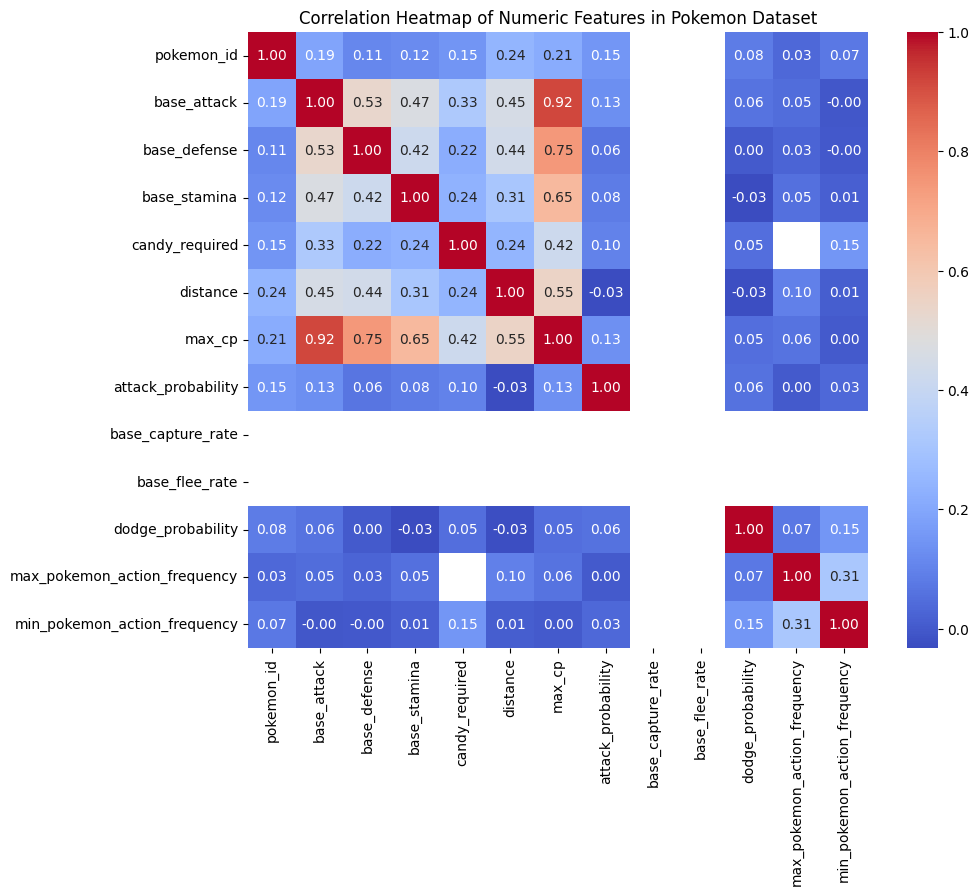

In [ ]:
# Seleccionar solo las columnas numéricas
flores_ds_numeric = flores_ds.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
corr_mat = flores_ds_numeric.corr()

# Graficar el heatmap de la matriz de correlación
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features in Pokemon Dataset")
plt.show()


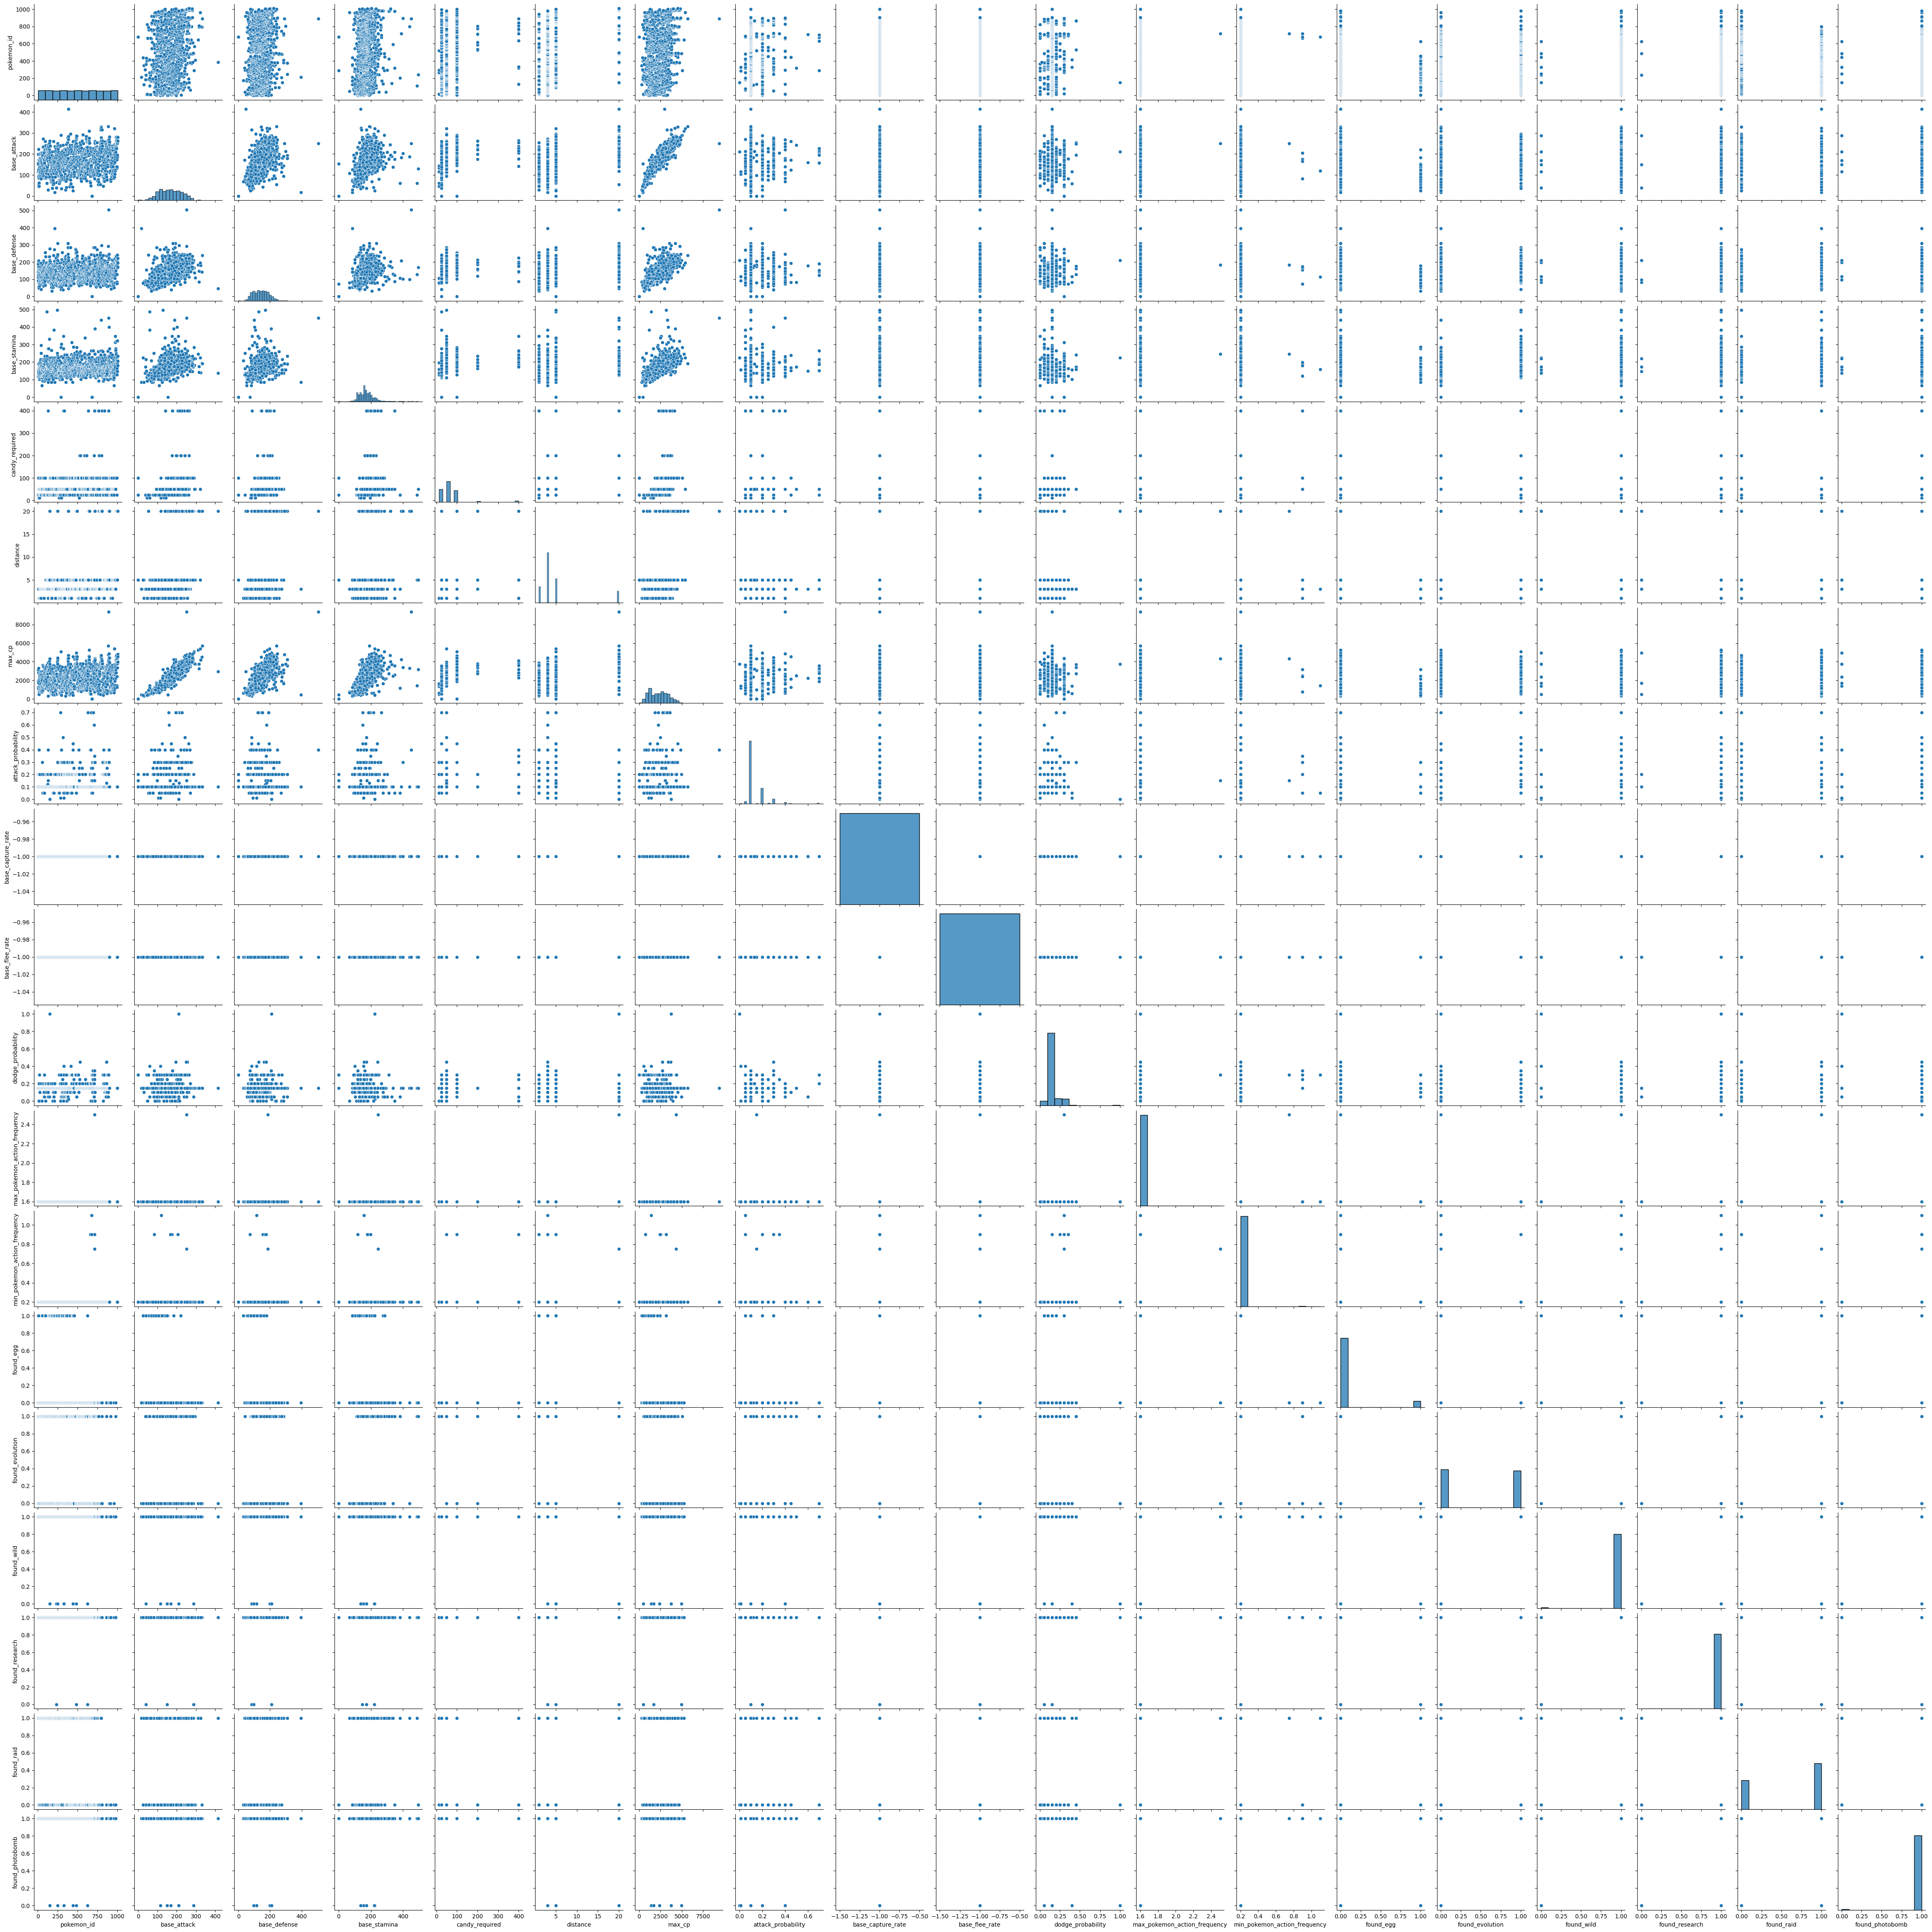

In [ ]:
sns.pairplot(flores_ds)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA (2)

In [ ]:
res = pca.fit_transform(flores_ds[['base_attack', 'base_defense', 'base_stamina']])
flores_ds['x']= res [:,0]
flores_ds['y']= res [:,1]
flores_ds

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb,x,y
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,1.6,0.2,True,False,True,True,True,True,-71.400166,-11.182635
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,1.6,0.2,False,True,True,True,True,True,-18.430927,-6.721017
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,1.6,0.2,False,True,True,True,True,True,55.688273,-3.431190
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,...,1.6,0.2,True,False,True,True,True,True,-87.210427,-17.010928
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,1.6,0.2,False,True,True,True,True,True,-24.659618,-11.682105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1004,Chi-Yu,269,221,146,"['Dark', 'Fire']",Legendary,"['Dark Pulse', 'Flame Charge', 'Flame Wheel']","['Incinerate', 'Snarl']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.421954,-79.018432
1003,1005,Roaring Moon,280,196,233,"['Dragon', 'Dark']",Standard,['Struggle'],['Splash'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.573486,-5.493631
1004,1006,Iron Valiant,279,171,179,"['Fairy', 'Fighting']",Standard,['Struggle'],['Splash'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.807532,-49.477934
1005,1007,Koraidon,263,223,205,"['Fighting', 'Dragon']",Legendary,"['Giga Impact', 'Dragon Claw', 'Close Combat',...","['Rock Smash', 'Dragon Tail']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.863229,-24.841405


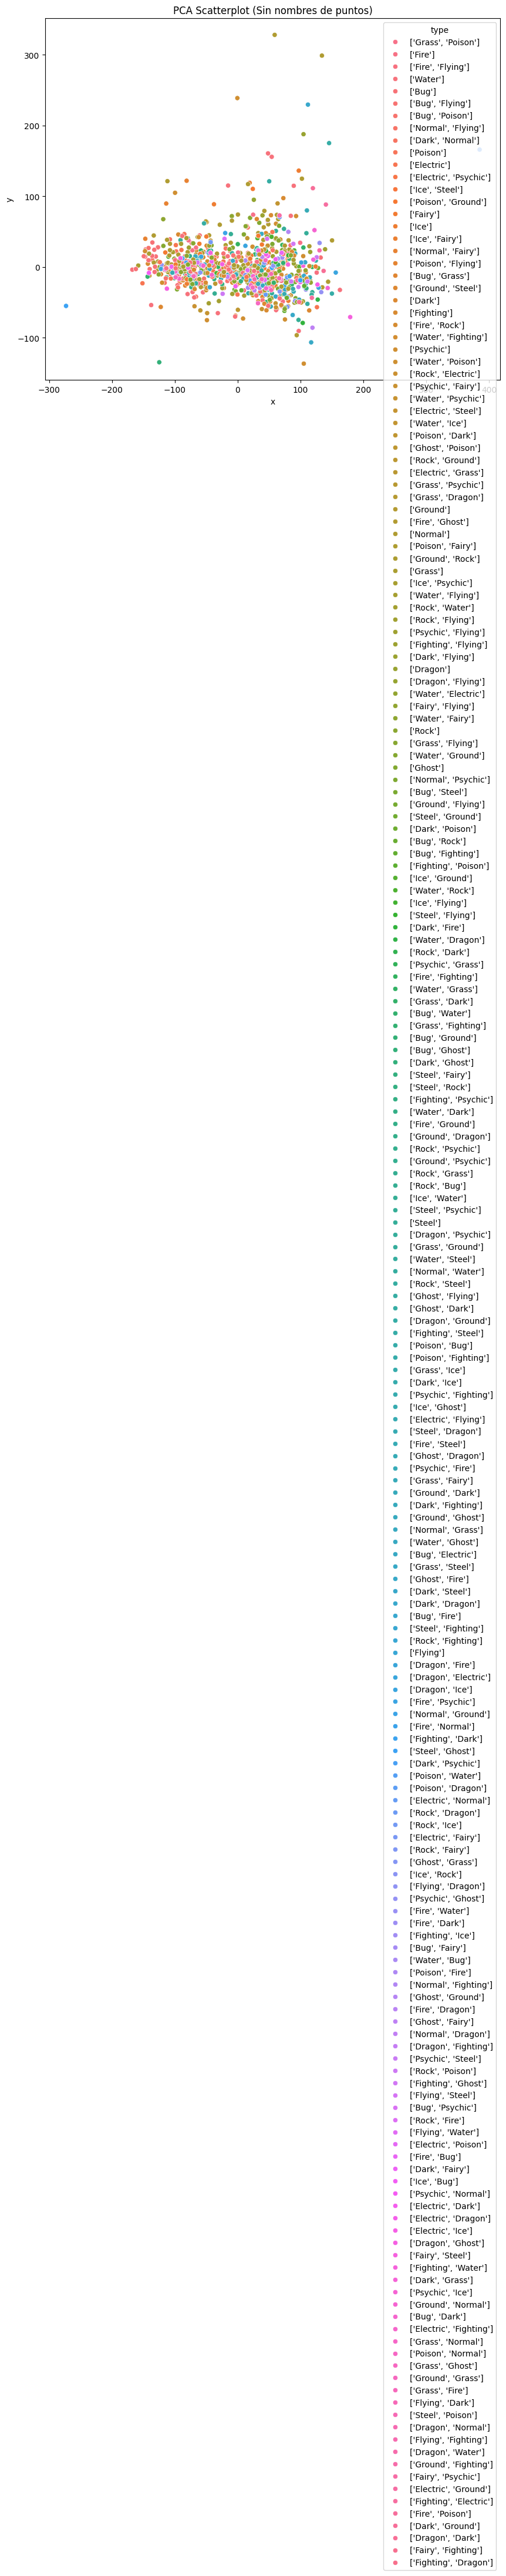

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar los resultados de PCA con scatterplot sin los nombres que tapan la gráfica
plt.figure(figsize=(10, 8))
sns.scatterplot(data=flores_ds, x='x', y='y', hue='type', legend="full")

# Opcional: ajusta la leyenda si es necesario
plt.title("PCA Scatterplot (Sin nombres de puntos)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
flores_x = flores_ds[['base_attack', 'base_defense', 'base_stamina']]
flores_x

,base_attack,base_defense,base_stamina
0,118,111,128
1,151,143,155
2,198,189,190
3,116,93,118
4,158,126,151
...,...,...,...
1002,269,221,146
1003,280,196,233
1004,279,171,179
1005,263,223,205


In [ ]:
from sklearn.model_selection import train_test_split

# Seleccionar las columnas de características (features) que usaremos para el modelo
flores_x = flores_ds[['base_attack', 'base_defense', 'base_stamina']]

# Seleccionar la columna objetivo que queremos predecir ('type' en lugar de 'Species')
flores_y = flores_ds['type']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(flores_x, flores_y, test_size=0.2, random_state=123)

# Verificamos las dimensiones de los sets resultantes
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((805, 3), (202, 3), (805,), (202,))

In [ ]:
x_test

,base_attack,base_defense,base_stamina
50,201,142,111
425,180,102,312
204,161,205,181
85,85,121,163
797,323,182,139
...,...,...,...
698,186,163,265
446,127,78,120
338,93,82,137
195,261,175,163


In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [ ]:
knn5.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [ ]:
knn5pred = knn5.predict(x_test)

In [ ]:
x_test

,base_attack,base_defense,base_stamina
50,201,142,111
425,180,102,312
204,161,205,181
85,85,121,163
797,323,182,139
...,...,...,...
698,186,163,265
446,127,78,120
338,93,82,137
195,261,175,163


In [ ]:
knn5pred

array(["['Water']", "['Fighting']", "['Grass']", "['Grass', 'Flying']",
       "['Dark']", "['Normal', 'Flying']", "['Psychic', 'Fire']",
       "['Dark', 'Normal']", "['Fire']", "['Psychic']", "['Bug', 'Fire']",
       "['Bug', 'Electric']", "['Bug', 'Rock']", "['Bug', 'Poison']",
       "['Fighting']", "['Electric']", "['Dark', 'Fairy']",
       "['Bug', 'Flying']", "['Bug']", "['Bug', 'Fighting']",
       "['Bug', 'Flying']", "['Normal']", "['Normal']",
       "['Fighting', 'Ghost']", "['Dragon', 'Ice']", "['Electric']",
       "['Bug', 'Flying']", "['Electric']", "['Dragon', 'Ice']",
       "['Bug']", "['Grass', 'Flying']", "['Fairy']", "['Grass', 'Ice']",
       "['Grass']", "['Bug']", "['Bug', 'Flying']", "['Fighting']",
       "['Dragon', 'Ground']", "['Bug', 'Psychic']", "['Dragon']",
       "['Electric', 'Fairy']", "['Water']", "['Fighting', 'Dark']",
       "['Electric', 'Fighting']", "['Fire']", "['Fairy']",
       "['Ghost', 'Ground']", "['Bug', 'Poison']", "['Ground', 'Nor

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, knn5pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, knn5pred)

0.034653465346534656

In [ ]:
for k in range(1,50,2):
  knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  knn.fit(x_train,y_train)
  knnpred = knn.predict(x_test)
  acc=accuracy_score(y_test, knnpred)
  print(f'K={k}\tAccuracy={acc}')

K=1	Accuracy=0.054455445544554455
K=3	Accuracy=0.06435643564356436
K=5	Accuracy=0.034653465346534656
K=7	Accuracy=0.034653465346534656
K=9	Accuracy=0.04455445544554455
K=11	Accuracy=0.04950495049504951
K=13	Accuracy=0.0594059405940594
K=15	Accuracy=0.0594059405940594
K=17	Accuracy=0.054455445544554455
K=19	Accuracy=0.06435643564356436
K=21	Accuracy=0.06930693069306931
K=23	Accuracy=0.06435643564356436
K=25	Accuracy=0.06930693069306931
K=27	Accuracy=0.07920792079207921
K=29	Accuracy=0.06930693069306931
K=31	Accuracy=0.07920792079207921
K=33	Accuracy=0.07920792079207921
K=35	Accuracy=0.08415841584158416
K=37	Accuracy=0.07425742574257425
K=39	Accuracy=0.06930693069306931
K=41	Accuracy=0.06435643564356436
K=43	Accuracy=0.054455445544554455
K=45	Accuracy=0.0594059405940594
K=47	Accuracy=0.054455445544554455
K=49	Accuracy=0.0594059405940594


In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn5.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
# Solicitar al usuario datos de ataque, defensa y stamina
base_attack = float(input("Ingresa el valor de ataque (base_attack): "))
base_defense = float(input("Ingresa el valor de defensa (base_defense): "))
base_stamina = float(input("Ingresa el valor de stamina (base_stamina): "))

# Crear un array con los datos ingresados por el usuario
user_data = [[base_attack, base_defense, base_stamina]]

# Usar el modelo entrenado para hacer una predicción con los datos ingresados por el usuario
user_prediction = knn5.predict(user_data)

# Mostrar el tipo de Pokémon que predice el modelo
print(f"El modelo predice que el tipo de Pokémon es: {user_prediction[0]}")


Ingresa el valor de ataque (base_attack): 15
Ingresa el valor de defensa (base_defense): 20
Ingresa el valor de stamina (base_stamina): 40
El modelo predice que el tipo de Pokémon es: ['Steel', 'Ghost']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Crear un DataFrame con los datos ingresados por el usuario
x_test = pd.DataFrame([[base_attack, base_defense, base_stamina]],
                      columns=['base_attack', 'base_defense', 'base_stamina'])

# Hacer la predicción usando el modelo KNN entrenado
prediction = knn5.predict(x_test)

# Mostrar el DataFrame de prueba y la predicción
print(x_test)
print(f"El modelo predice que el tipo de Pokémon es: {prediction[0]}")


   base_attack  base_defense  base_stamina
0         15.0          20.0          40.0
El modelo predice que el tipo de Pokémon es: ['Steel', 'Ghost']


In [ ]:
knn5pred = knn5.predict(x_test)
knn5pred

array(["['Steel', 'Ghost']"], dtype=object)